# Warcraft shortest path
This notebook applies different training methods on the Warcraft shortest path problem.

Code based on: https://github.com/khalil-research/PyEPO (examples)

In [1]:
import random
import torch
from matplotlib import pyplot as plt
import numpy as np

# fix random seed
# for reproducibility
random.seed(135)
np.random.seed(135)
torch.manual_seed(135)

In [2]:
# Load data to memory
k = 12

tmaps_train = np.load("warcraft_maps/warcraft_shortest_path_oneskin/{}x{}/train_maps.npy".format(k,k))
tmaps_test = np.load("warcraft_maps/warcraft_shortest_path_oneskin/{}x{}/test_maps.npy".format(k,k))
costs_train = np.load("warcraft_maps/warcraft_shortest_path_oneskin/{}x{}/train_vertex_weights.npy".format(k,k))
costs_test = np.load("warcraft_maps/warcraft_shortest_path_oneskin/{}x{}/test_vertex_weights.npy".format(k,k))
paths_train = np.load("warcraft_maps/warcraft_shortest_path_oneskin/{}x{}/train_shortest_paths.npy".format(k,k))
paths_test = np.load("warcraft_maps/warcraft_shortest_path_oneskin/{}x{}/test_shortest_paths.npy".format(k,k))

print("Training dataset size")
print(len(tmaps_train))

print("Test dataset size")
print(len(tmaps_test))

Training dataset size
10000
Test dataset size
1000


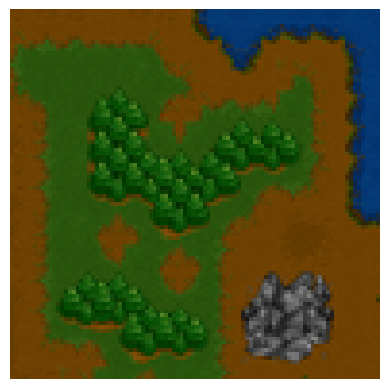

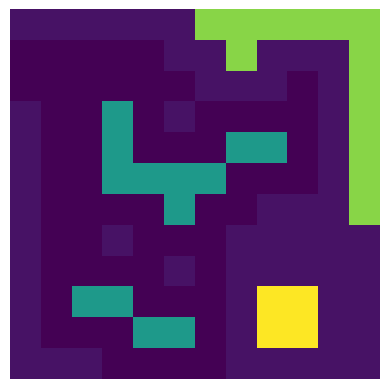

In [3]:
plt.axis("off")
plt.imshow(tmaps_train[100])
plt.show()

plt.axis("off")
plt.imshow(costs_train[100])
plt.show()

In [4]:
from dataloader import mapDataset
dataset_train = mapDataset(tmaps_train, costs_train, paths_train)
dataset_test = mapDataset(tmaps_test, costs_test, paths_test)

# dataloader
from torch.utils.data import DataLoader
batch_size = 70
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [5]:
# number of epochs
epochs = 50
# learning rate
lr = 5e-4
# log step
log_step = 1

In [6]:
from opt_model import shortestPathModel
# init model
grid = (k, k)
optmodel = shortestPathModel(grid)

Auto-Sklearn cannot be imported.
Restricted license - for non-production use only - expires 2025-11-24


### TWO PHASE with MSE loss

In [7]:
from twop_mse import TwoPhaseMSE

twopMSE = TwoPhaseMSE("two phase MSE", loader_train, loader_test, epochs, lr, log_step, optmodel)
twopMSE.train()


/home/salim/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/salim/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Epoch: 49, Loss: 0.4656: 100%|██████████| 50/50 [05:00<00:00,  6.01s/it]


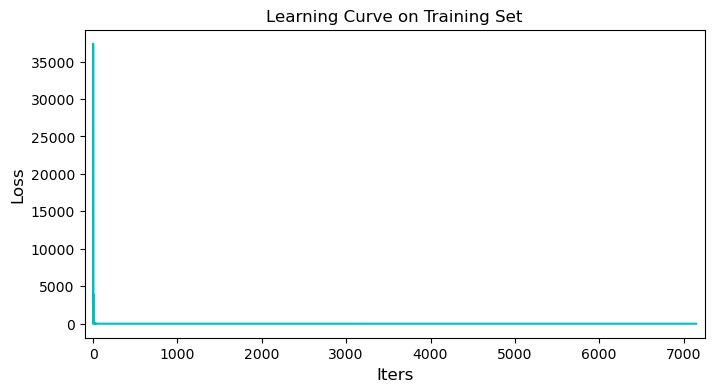

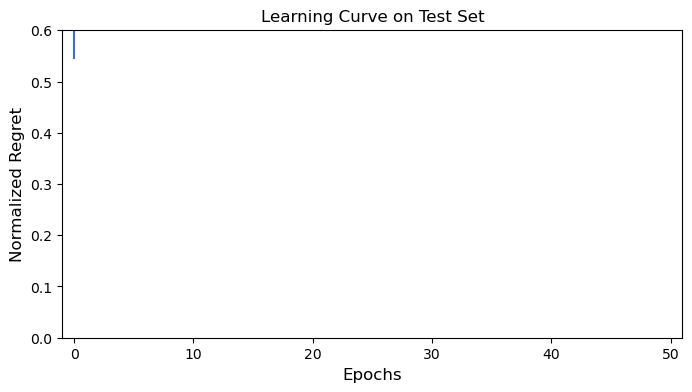

Test set:


100%|██████████| 15/15 [00:15<00:00,  1.06s/it]


Avg Regret: 0.2809
Avg Rel Regret: 1.31%
Path Accuracy: 93.82%
Optimality Ratio: 67.90%
Train set:


100%|██████████| 143/143 [02:39<00:00,  1.11s/it]


Avg Regret: 0.3134
Avg Rel Regret: 1.45%
Path Accuracy: 93.75%
Optimality Ratio: 66.83%


In [8]:
twopMSE.plot()

### TWO PHASE with BCE loss

In [9]:
from twop_bce import TwoPhaseBCE

twoPhaseBCE = TwoPhaseBCE("two phase BCE", loader_train, loader_test, 150, lr, log_step, optmodel)
twoPhaseBCE.train()


Epoch: 149, Loss: 7.0984: 100%|██████████| 150/150 [14:01<00:00,  5.61s/it]


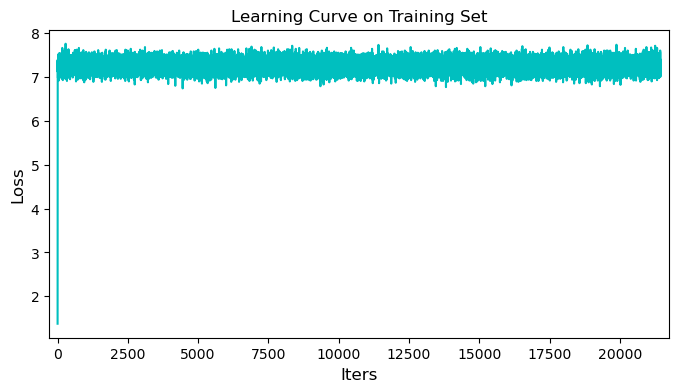

Test set:


100%|██████████| 15/15 [00:14<00:00,  1.02it/s]


Path Accuracy: 10.81%
Optimality Ratio: 0.00%
Train set:


100%|██████████| 143/143 [02:20<00:00,  1.01it/s]


Path Accuracy: 10.81%
Optimality Ratio: 0.00%


In [10]:
twoPhaseBCE.plot()

### END2END with SPO+

In [11]:
from spoplus import SPOPlus

spoplus = SPOPlus("spoplus", loader_train, loader_test, epochs, lr, log_step, optmodel, processes=8)
spoplus.train()

Num of cores: 8


Epoch: 49, Loss: 1.7599: 100%|██████████| 50/50 [48:04<00:00, 57.69s/it]  


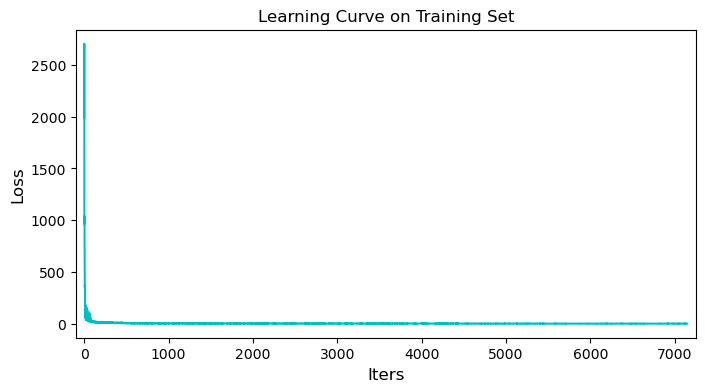

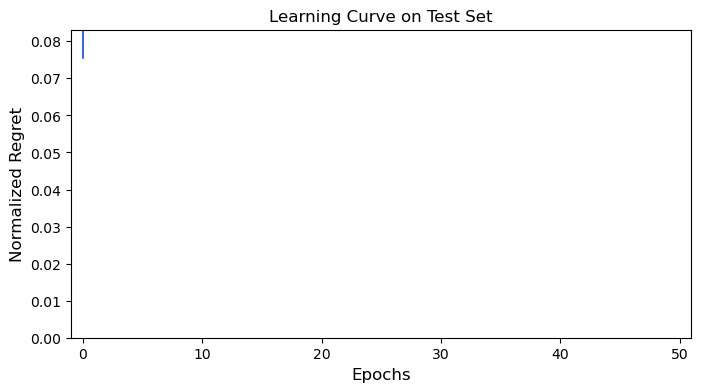

Test set:


100%|██████████| 15/15 [00:15<00:00,  1.02s/it]


Avg Regret: 0.2045
Avg Rel Regret: 0.90%
Path Accuracy: 97.27%
Optimality Ratio: 80.10%
Train set:


100%|██████████| 143/143 [02:25<00:00,  1.02s/it]


Avg Regret: 0.1847
Avg Rel Regret: 0.78%
Path Accuracy: 97.33%
Optimality Ratio: 81.27%


In [12]:
spoplus.plot()

### END2END with DBB

In [13]:
"""
dbb_lr = 1e-5

from bdd import BDD

bdd = BDD("bdd", loader_train, loader_test, epochs, dbb_lr, log_step, optmodel, processes=8)
bdd.train()
"""

'\ndbb_lr = 1e-5\n\nfrom bdd import BDD\n\nbdd = BDD("bdd", loader_train, loader_test, epochs, dbb_lr, log_step, optmodel, processes=8)\nbdd.train()\n'

In [14]:
# bdd.plot()